<a href="https://colab.research.google.com/github/kiera-dev/ACNH_Colab_SQL/blob/main/ACNH_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install duckdb

In [71]:
import duckdb, os
import pandas as pd


acnh_villagers_csv_path = "/content/drive/MyDrive/acnh_data/Villagers.csv"
acnh_housewares_csv_path = "/content/drive/MyDrive/acnh_data/Housewares.csv"
acnh_fish_csv_path = "/content/drive/MyDrive/acnh_data/Fish.csv"


if os.path.exists(acnh_villagers_csv_path):

  print(f"Loading Villagers: {acnh_villagers_csv_path}")
  villagers_df = pd.read_csv(acnh_villagers_csv_path)
  # villagers_df = villagers_df.rename(columns={"Favorite Song": "favorite_song"})

  print(f"Loading Furniture: {acnh_housewares_csv_path}")
  housewares_df = pd.read_csv(acnh_housewares_csv_path)


  print(f"Loading Fish: {acnh_fish_csv_path}")
  fish_df = pd.read_csv(acnh_fish_csv_path)


  dataframes=[fish_df, villagers_df, housewares_df]

  print(f"Getting rid of spaces in column names")
  for df in dataframes:
    df = df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('/','_'),inplace=True)


  print(f"Hiding some columns")
  columns_to_drop = ['icon_image', 'house_image', 'photo_image', 'subtype', 'image', 'pattern', 'pattern_title', 'critterpedia_image', 'furniture_image']
  for df in dataframes:
      for column in columns_to_drop:
        if column in df.columns:
          df.drop(column,axis=1,inplace=True)

  # print(f"fish things")
  # def format_value(borked_value: str):
  #   print(borked_value)
  #   value_array = borked_value.split("–")
  #   print(value_array)
  #   try:
  #     value_array = [int(x) for x in value_array]
  #     print(value_array)
  #     print()
  #     return sum(value_array) / len(value_array)
  #   except Exception as e:
  #     print(e)

  # fish_df["spawn_rates"] = fish_df.spawn_rates.apply(format_value)
  # fish_df

else:
  print(f"Derp not connecting")


villagers_df
housewares_df
fish_df

Loading Villagers: /content/drive/MyDrive/acnh_data/Villagers.csv
Loading Furniture: /content/drive/MyDrive/acnh_data/Housewares.csv
Loading Fish: /content/drive/MyDrive/acnh_data/Fish.csv
Getting rid of spaces in column names
Hiding some columns


,#,name,sell,where_how,shadow,catch_difficulty,vision,total_catches_to_unlock,spawn_rates,nh_jan,...,hha_base_points,hha_category,color_1,color_2,lighting_type,icon_filename,critterpedia_filename,furniture_filename,internal_id,unique_entry_id
0,56,anchovy,200,Sea,Small,Very Easy,Very Wide,0,2–5,4 AM – 9 PM,...,71,Pet,Blue,Red,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,Easy,Medium,20,2–5,NaN,...,71,Pet,Yellow,Black,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
2,44,arapaima,10000,River,XX-Large,Very Hard,Narrow,50,1,NaN,...,71,Pet,Black,Blue,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
3,41,arowana,10000,River,Large,Very Hard,Medium,50,1–2,NaN,...,71,Pet,Yellow,Black,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
4,58,barred knifejaw,5000,Sea,Medium,Hard,Medium,20,3–5,NaN,...,71,Pet,White,Black,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23,tilapia,800,River,Medium,Hard,Medium,0,7–9,NaN,...,71,Pet,Black,Black,Fluorescent,Fish76,FishThirapia,FtrFishThirapia,4190,as78rnkwY3ahrTkBY
76,66,tuna,7000,Pier,XX-Large,Very Hard,Narrow,50,2,All day,...,71,Pet,Blue,Black,Fluorescent,Fish57,FishMaguro,FtrFishMaguro,2274,4PnGXx9DSb866AeCM
77,75,whale shark,13000,Sea,X-Large w/Fin,Very Hard,Very Narrow,50,1,NaN,...,71,Pet,Black,Blue,No lighting,Fish72,FishJinbeezame,FtrFishJinbee,2282,r3RAtJsXENwnFvQh7
78,21,yellow perch,300,River,Medium,Medium,Narrow,0,7–10,All day,...,71,Pet,Yellow,Black,Fluorescent,Fish18,FishYellowparch,FtrFishYellowparch,2233,bLgE5dicZniF5zZDW


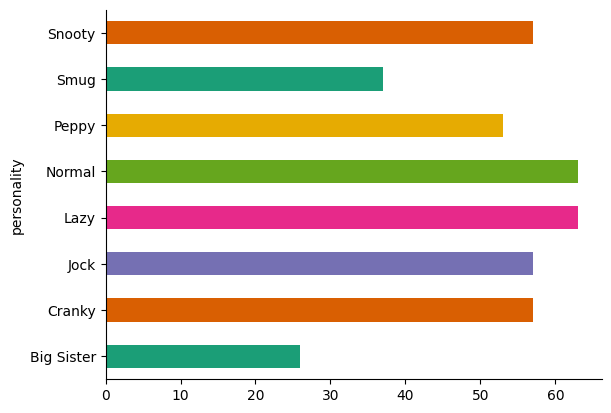

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
villagers_df.groupby('personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha    │ Female  │ Cat     │ Snooty      │ me meow     │
│ Bob      │ Male    │ Cat     │ Lazy        │ pthhpth     │
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Kabuki   │ Male    │ Cat     │ Cranky      │ meooo-OH    │
│ Katt     │ Female  │ Cat     │ Big Sister  │ purrty      │
│ Kid Cat  │ Male    │ Cat     │ Jock        │ psst        │
│ Kiki     │ Female  │ Cat     │ Normal      │ kitty cat   │
│ Kitty    │ Female  │ Cat     │ Snooty      │ mrowrr      │
│ Lolly    │ Female  │ Cat     │ Normal      │ bonbon      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Mitzi    │ Female  │ Cat     │ Normal      │ mew         │
│ Moe      │ Male    │ Cat     │ Lazy        │ myawn       │
│ Monique  │ Female  │ C

In [ ]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND personality = 'Peppy'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Rosie    │ Female  │ Cat     │ Peppy       │ silly       │
│ Tabby    │ Female  │ Cat     │ Peppy       │ me-WOW      │
│ Tangy    │ Female  │ Cat     │ Peppy       │ reeeeOWR    │
└──────────┴─────────┴─────────┴─────────────┴─────────────┘

In [ ]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND name LIKE 'A%'")

┌─────────┬─────────┬─────────┬─────────────┬─────────────┐
│  name   │ gender  │ species │ personality │ catchphrase │
│ varchar │ varchar │ varchar │   varchar   │   varchar   │
├─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha   │ Female  │ Cat     │ Snooty      │ me meow     │
└─────────┴─────────┴─────────┴─────────────┴─────────────┘

In [ ]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count FROM villagers_df GROUP BY personality")

┌─────────────┬───────────────────┐
│ personality │ personality_count │
│   varchar   │       int64       │
├─────────────┼───────────────────┤
│ Jock        │                57 │
│ Cranky      │                57 │
│ Peppy       │                53 │
│ Big Sister  │                26 │
│ Lazy        │                63 │
│ Normal      │                63 │
│ Snooty      │                57 │
│ Smug        │                37 │
└─────────────┴───────────────────┘

In [ ]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df ) AS personality_percentage FROM villagers_df GROUP BY personality ORDER BY personality_count ASC")

┌─────────────┬───────────────────┬────────────────────────┐
│ personality │ personality_count │ personality_percentage │
│   varchar   │       int64       │         double         │
├─────────────┼───────────────────┼────────────────────────┤
│ Big Sister  │                26 │      6.295399515738499 │
│ Smug        │                37 │      8.958837772397095 │
│ Peppy       │                53 │     12.832929782082324 │
│ Cranky      │                57 │     13.801452784503631 │
│ Snooty      │                57 │     13.801452784503631 │
│ Jock        │                57 │     13.801452784503631 │
│ Lazy        │                63 │     15.254237288135593 │
│ Normal      │                63 │     15.254237288135593 │
└─────────────┴───────────────────┴────────────────────────┘

In [ ]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS cranky_percentage FROM villagers_df WHERE personality = 'Cranky'")

┌────────────────────┐
│ cranky_percentage  │
│       double       │
├────────────────────┤
│ 13.801452784503631 │
└────────────────────┘

In [ ]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df WHERE species = 'Cat') AS cat_cranky_percentage FROM villagers_df WHERE species = 'Cat' AND personality = 'Cranky'")

┌───────────────────────┐
│ cat_cranky_percentage │
│        double         │
├───────────────────────┤
│     8.695652173913043 │
└───────────────────────┘

In [ ]:
duckdb.sql("SELECT personality, COUNT(*) AS cat_personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df WHERE species = 'Cat') AS cat_personality_percentage FROM villagers_df WHERE species = 'Cat' GROUP BY personality ORDER BY cat_personality_count ASC")

┌─────────────┬───────────────────────┬────────────────────────────┐
│ personality │ cat_personality_count │ cat_personality_percentage │
│   varchar   │         int64         │           double           │
├─────────────┼───────────────────────┼────────────────────────────┤
│ Big Sister  │                     1 │         4.3478260869565215 │
│ Smug        │                     1 │         4.3478260869565215 │
│ Cranky      │                     2 │          8.695652173913043 │
│ Lazy        │                     3 │         13.043478260869565 │
│ Normal      │                     3 │         13.043478260869565 │
│ Jock        │                     3 │         13.043478260869565 │
│ Snooty      │                     5 │          21.73913043478261 │
│ Peppy       │                     5 │          21.73913043478261 │
└─────────────┴───────────────────────┴────────────────────────────┘

In [ ]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS alligator_percentage FROM villagers_df WHERE species = 'Alligator'")

┌──────────────────────┐
│ alligator_percentage │
│        double        │
├──────────────────────┤
│    1.937046004842615 │
└──────────────────────┘

In [ ]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Alligator'")

┌─────────┬─────────┬───────────┬─────────────┬─────────────┐
│  name   │ gender  │  species  │ personality │ catchphrase │
│ varchar │ varchar │  varchar  │   varchar   │   varchar   │
├─────────┼─────────┼───────────┼─────────────┼─────────────┤
│ Alfonso │ Male    │ Alligator │ Lazy        │ it'sa me    │
│ Alli    │ Female  │ Alligator │ Snooty      │ graaagh     │
│ Boots   │ Male    │ Alligator │ Jock        │ munchie     │
│ Del     │ Male    │ Alligator │ Cranky      │ gronk       │
│ Drago   │ Male    │ Alligator │ Lazy        │ burrrn      │
│ Gayle   │ Female  │ Alligator │ Normal      │ snacky      │
│ Roswell │ Male    │ Alligator │ Smug        │ spaaace     │
│ Sly     │ Male    │ Alligator │ Jock        │ hoo-rah     │
└─────────┴─────────┴───────────┴─────────────┴─────────────┘

In [ ]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df ORDER BY species DESC")

┌──────────┬───────────┬─────────────┬─────────────┐
│   name   │  species  │ personality │ catchphrase │
│ varchar  │  varchar  │   varchar   │   varchar   │
├──────────┼───────────┼─────────────┼─────────────┤
│ Kyle     │ Wolf      │ Smug        │ alpha       │
│ Dobie    │ Wolf      │ Cranky      │ ohmmm       │
│ Lobo     │ Wolf      │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf      │ Normal      │ airmail     │
│ Audie    │ Wolf      │ Peppy       │ foxtrot     │
│ Vivian   │ Wolf      │ Snooty      │ piffle      │
│ Chief    │ Wolf      │ Cranky      │ harrumph    │
│ Freya    │ Wolf      │ Snooty      │ uff da      │
│ Fang     │ Wolf      │ Cranky      │ cha-chomp   │
│ Wolfgang │ Wolf      │ Cranky      │ snarrrl     │
│    ·     │  ·        │   ·         │   ·         │
│    ·     │  ·        │   ·         │   ·         │
│    ·     │  ·        │   ·         │   ·         │
│ Anabelle │ Anteater  │ Peppy       │ snorty      │
│ Zoe      │ Anteater  │ Normal      │ zoozoor

In [ ]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df WHERE species = 'Wolf'")

┌──────────┬─────────┬─────────────┬─────────────┐
│   name   │ species │ personality │ catchphrase │
│ varchar  │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────────┼─────────────┤
│ Audie    │ Wolf    │ Peppy       │ foxtrot     │
│ Chief    │ Wolf    │ Cranky      │ harrumph    │
│ Dobie    │ Wolf    │ Cranky      │ ohmmm       │
│ Fang     │ Wolf    │ Cranky      │ cha-chomp   │
│ Freya    │ Wolf    │ Snooty      │ uff da      │
│ Kyle     │ Wolf    │ Smug        │ alpha       │
│ Lobo     │ Wolf    │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf    │ Normal      │ airmail     │
│ Vivian   │ Wolf    │ Snooty      │ piffle      │
│ Whitney  │ Wolf    │ Snooty      │ snappy      │
│ Wolfgang │ Wolf    │ Cranky      │ snarrrl     │
├──────────┴─────────┴─────────────┴─────────────┤
│ 11 rows                              4 columns │
└────────────────────────────────────────────────┘

In [ ]:
duckdb.sql("SELECT species, COUNT(*) AS species_count, COUNT(*) * 100.0 / (SELECT COUNT(species) FROM villagers_df ) AS species_percentage FROM villagers_df GROUP BY species ORDER BY species_count ASC")

┌────────────┬───────────────┬────────────────────┐
│  species   │ species_count │ species_percentage │
│  varchar   │     int64     │       double       │
├────────────┼───────────────┼────────────────────┤
│ Octopus    │             4 │ 0.9685230024213075 │
│ Cow        │             4 │ 0.9685230024213075 │
│ Bull       │             6 │ 1.4527845036319613 │
│ Hippo      │             7 │  1.694915254237288 │
│ Lion       │             7 │  1.694915254237288 │
│ Rhinoceros │             7 │  1.694915254237288 │
│ Tiger      │             7 │  1.694915254237288 │
│ Anteater   │             8 │  1.937046004842615 │
│ Alligator  │             8 │  1.937046004842615 │
│ Kangaroo   │             8 │  1.937046004842615 │
│   ·        │             · │          ·         │
│   ·        │             · │          ·         │
│   ·        │             · │          ·         │
│ Horse      │            15 │ 3.6319612590799033 │
│ Bear       │            15 │ 3.6319612590799033 │
│ Mouse     

In [ ]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase,hobby FROM villagers_df WHERE hobby = 'Fitness' AND species = 'Gorilla' OR hobby = 'Fitness' AND species = 'Rabbit' ")

┌─────────┬─────────┬─────────┬─────────────┬─────────────────┬─────────┐
│  name   │ gender  │ species │ personality │   catchphrase   │  hobby  │
│ varchar │ varchar │ varchar │   varchar   │     varchar     │ varchar │
├─────────┼─────────┼─────────┼─────────────┼─────────────────┼─────────┤
│ Al      │ Male    │ Gorilla │ Lazy        │ ayyyeee         │ Fitness │
│ Boone   │ Male    │ Gorilla │ Jock        │ baboom          │ Fitness │
│ Boyd    │ Male    │ Gorilla │ Cranky      │ uh-oh           │ Fitness │
│ Cesar   │ Male    │ Gorilla │ Cranky      │ highness        │ Fitness │
│ Hans    │ Male    │ Gorilla │ Smug        │ groovy          │ Fitness │
│ Louie   │ Male    │ Gorilla │ Jock        │ hoo hoo ha      │ Fitness │
│ Peewee  │ Male    │ Gorilla │ Cranky      │ li'l bitty baby │ Fitness │
│ Rocket  │ Female  │ Gorilla │ Big Sister  │ vroom           │ Fitness │
│ Violet  │ Female  │ Gorilla │ Snooty      │ sweetie         │ Fitness │
│ Genji   │ Male    │ Rabbit  │ Jock  

In [ ]:
duckdb.sql("SELECT name,species,'Furniture List' FROM villagers_df ")

┌──────────┬───────────┬──────────────────┐
│   name   │  species  │ 'Furniture List' │
│ varchar  │  varchar  │     varchar      │
├──────────┼───────────┼──────────────────┤
│ Ace      │ Bird      │ Furniture List   │
│ Admiral  │ Bird      │ Furniture List   │
│ Agent S  │ Squirrel  │ Furniture List   │
│ Agnes    │ Pig       │ Furniture List   │
│ Al       │ Gorilla   │ Furniture List   │
│ Alfonso  │ Alligator │ Furniture List   │
│ Alice    │ Koala     │ Furniture List   │
│ Alli     │ Alligator │ Furniture List   │
│ Amelia   │ Eagle     │ Furniture List   │
│ Anabelle │ Anteater  │ Furniture List   │
│   ·      │  ·        │       ·          │
│   ·      │  ·        │       ·          │
│   ·      │  ·        │       ·          │
│ Weber    │ Duck      │ Furniture List   │
│ Wendy    │ Sheep     │ Furniture List   │
│ Whitney  │ Wolf      │ Furniture List   │
│ Willow   │ Sheep     │ Furniture List   │
│ Winnie   │ Horse     │ Furniture List   │
│ Wolfgang │ Wolf      │ Furnitu

In [ ]:
duckdb.sql("SELECT * FROM villagers_df ")
print(villagers_df.columns)
print(villagers_df.describe())
print(villagers_df.shape)

Index(['name', 'species', 'gender', 'personality', 'hobby', 'birthday',
       'catchphrase', 'favorite_song', 'favorite_saying', 'style_1', 'style_2',
       'color_1', 'color_2', 'default_clothing', 'default_umbrella',
       'wallpaper', 'flooring', 'furniture_list', 'furniture_name_list',
       'diy_workbench', 'kitchen_equipment', 'version_added', 'name_color',
       'bubble_color', 'filename', 'unique_entry_id'],
      dtype='object')
       default_clothing
count        413.000000
mean        5394.784504
std         2465.296680
min         2401.000000
25%         3386.000000
50%         4406.000000
75%         7887.000000
max        13759.000000
(413, 26)


In [ ]:
duckdb.sql("SELECT DISTINCT name,interact, FROM housewares_df WHERE DIY = 'Yes' ")

┌────────────────────────┬────────────────────┐
│          name          │      interact      │
│        varchar         │      varchar       │
├────────────────────────┼────────────────────┤
│ acoustic guitar        │ Musical Instrument │
│ angled signpost        │ No                 │
│ Aquarius urn           │ No                 │
│ asteroid               │ No                 │
│ bamboo doll            │ Yes                │
│ bamboo noodle slide    │ Yes                │
│ bamboo speaker         │ Music Player       │
│ bamboo stool           │ Chair              │
│ beekeeper's hive       │ No                 │
│ birdbath               │ No                 │
│    ·                   │ ·                  │
│    ·                   │ ·                  │
│    ·                   │ ·                  │
│ wooden mini table      │ No                 │
│ wooden simple bed      │ Bed                │
│ wooden stool           │ Chair              │
│ wooden table           │ No           

In [ ]:
duckdb.sql("SELECT DISTINCT name, FROM housewares_df WHERE DIY = 'Yes' AND interact = 'Yes'")

┌────────────────────────┐
│          name          │
│        varchar         │
├────────────────────────┤
│ gear tower             │
│ glowing-moss pond      │
│ glowing-moss statue    │
│ golden gear apparatus  │
│ illuminated present    │
│ illuminated snowflakes │
│ leaf campfire          │
│ bamboo noodle slide    │
│ big festive tree       │
│ bonfire                │
│    ·                   │
│    ·                   │
│    ·                   │
│ robot hero             │
│ rocking horse          │
│ sauna heater           │
│ space shuttle          │
│ spooky arch            │
│ spooky carriage        │
│ spooky scarecrow       │
│ tulip surprise box     │
│ Turkey Day hearth      │
│ water pump             │
├────────────────────────┤
│   57 rows (20 shown)   │
└────────────────────────┘

In [ ]:
duckdb.sql("SELECT name,species,personality,catchphrase, birthday,flooring,favorite_song FROM villagers_df WHERE name = 'Al' OR name = 'Audie' OR name ='Marina' OR name ='Renée' OR name = 'Flora' OR name = 'Lobo' OR name ='Bob' OR name = 'Mint' OR name = 'Snake' OR name ='Kidd' ORDER BY personality ASC")

┌─────────┬────────────┬─────────────┬─────────────┬──────────┬───────────────────────────┬───────────────┐
│  name   │  species   │ personality │ catchphrase │ birthday │         flooring          │ favorite_song │
│ varchar │  varchar   │   varchar   │   varchar   │ varchar  │          varchar          │    varchar    │
├─────────┼────────────┼─────────────┼─────────────┼──────────┼───────────────────────────┼───────────────┤
│ Renée   │ Rhinoceros │ Big Sister  │ yo yo yo    │ 5/28     │ tiger-print flooring      │ Surfin' K.K.  │
│ Lobo    │ Wolf       │ Cranky      │ ah-rooooo   │ 11/5     │ rosewood flooring         │ K.K. Rock     │
│ Snake   │ Rabbit     │ Jock        │ bunyip      │ 11/3     │ dirt flooring             │ King K.K.     │
│ Al      │ Gorilla    │ Lazy        │ ayyyeee     │ 10/18    │ green rubber flooring     │ Go K.K. Rider │
│ Bob     │ Cat        │ Lazy        │ pthhpth     │ 1/1      │ colorful puzzle flooring  │ Neapolitan    │
│ Marina  │ Octopus    │ Nor

In [ ]:
duckdb.sql("SELECT * FROM housewares_df ")
print(housewares_df.columns)
print(housewares_df.describe())
print(housewares_df.shape)

Index(['name', 'variation', 'body_title', 'diy', 'body_customize',
       'pattern_customize', 'pattern_customize_options', 'kit_cost',
       'kit_type', 'cyrus_customize_price', 'buy', 'sell', 'color_1',
       'color_2', 'size', 'surface', 'exchange_price', 'exchange_currency',
       'source', 'source_notes', 'season/event', 'season/event_exclusive',
       'hha_base_points', 'hha_concept_1', 'hha_concept_2', 'hha_series',
       'hha_set', 'hha_category', 'interact', 'tag', 'outdoor', 'speaker_type',
       'lighting_type', 'catalog', 'version_added', 'unlocked?', 'filename',
       'variant_id', 'internal_id', 'unique_entry_id'],
      dtype='object')
          kit_cost  cyrus_customize_price           sell  exchange_price  \
count  6474.000000            8322.000000    8537.000000     6514.000000   
mean      3.658326            2840.603220    5639.133654    18562.577832   
std       3.995444            2866.457073   17181.514964    61598.109220   
min       1.000000            

In [ ]:
duckdb.sql("SELECT name,hha_series FROM housewares_df WHERE NOT hha_series = 'None'")

┌────────────────────┬─────────────────────────┐
│        name        │       hha_series        │
│      varchar       │         varchar         │
├────────────────────┼─────────────────────────┤
│ ? Block            │ Mario                   │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│       ·            │    ·                    │
│       ·            │    ·                    │
│       ·            │    ·                    │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool

In [ ]:
duckdb.sql("SELECT DISTINCT hha_series FROM housewares_df")

┌─────────────────────────┐
│       hha_series        │
│         varchar         │
├─────────────────────────┤
│ fruits                  │
│ Cinnamoroll             │
│ cool                    │
│ flowers                 │
│ dreamy                  │
│ Festivale               │
│ tree's bounty or leaves │
│ imperial                │
│ plaza                   │
│ iron                    │
│  ·                      │
│  ·                      │
│  ·                      │
│ mush                    │
│ My Melody               │
│ Nordic                  │
│ pirate                  │
│ rattan                  │
│ simple                  │
│ spooky                  │
│ throwback               │
│ vintage                 │
│ wooden block            │
├─────────────────────────┤
│   49 rows (20 shown)    │
└─────────────────────────┘

In [ ]:
duckdb.sql("SELECT DISTINCT name, hha_series FROM housewares_df WHERE hha_series ='cute' OR hha_series ='zen'")

┌─────────────────┬────────────┐
│      name       │ hha_series │
│     varchar     │  varchar   │
├─────────────────┼────────────┤
│ cute bed        │ cute       │
│ cute DIY table  │ cute       │
│ cute tea table  │ cute       │
│ cute chair      │ cute       │
│ cute floor lamp │ cute       │
│ cute sofa       │ cute       │
│ cute vanity     │ cute       │
│ cute wardrobe   │ cute       │
└─────────────────┴────────────┘

In [ ]:
duckdb.sql("SELECT DISTINCT hha_concept_1 FROM housewares_df ORDER BY hha_concept_1 ASC")

┌────────────────┐
│ hha_concept_1  │
│    varchar     │
├────────────────┤
│ European       │
│ None           │
│ amusement park │
│ ancient        │
│ apparel shop   │
│ arcade         │
│ bathroom       │
│ café           │
│ child's room   │
│ city life      │
│     ·          │
│     ·          │
│     ·          │
│ restaurant     │
│ retro          │
│ school         │
│ sci-fi         │
│ shop           │
│ space          │
│ sports         │
│ stylish        │
│ supermarket    │
│ workshop       │
├────────────────┤
│    46 rows     │
│   (20 shown)   │
└────────────────┘

In [ ]:
duckdb.sql("SELECT DISTINCT hha_concept_1 FROM housewares_df").df()

,hha_concept_1
0,fancy
1,concert
2,school
3,ocean
4,expensive
5,space
6,bathroom
7,garden
8,child's room
9,workshop


In [ ]:
duckdb.sql("SELECT DISTINCT name, hha_concept_1 FROM housewares_df WHERE hha_concept_1 = 'harmonious' AND name NOT LIKE 'bamboo%'").df()

,name,hha_concept_1
0,floor seat,harmonious
1,gong,harmonious
2,imperial low table,harmonious
3,Japanese dresser,harmonious
4,low screen,harmonious
5,maple-leaf pond stone,harmonious
6,mossy garden rock,harmonious
7,squat toilet,harmonious
8,sword,harmonious
9,tatami bed,harmonious


In [ ]:
duckdb.sql("SELECT DISTINCT name, where_how, total_catches_to_unlock, nh_jan FROM fish_df WHERE nh_jan <> 'NULL'").df()

,name,where_how,total_catches_to_unlock,nh_jan
0,anchovy,Sea,0,4 AM – 9 PM
1,barreleye,Sea,100,9 PM – 4 AM
2,black bass,River,0,All day
3,blowfish,Sea,20,9 PM – 4 AM
4,coelacanth,Sea (rainy days),100,All day
5,dab,Sea,0,All day
6,dace,River,0,4 PM – 9 AM
7,oarfish,Sea,50,All day
8,olive flounder,Sea,0,All day
9,pop-eyed goldfish,Pond,0,9 AM – 4 PM


In [3]:
duckdb.sql("SELECT * FROM fish_df ")
print(fish_df.columns)
print(fish_df.describe())
print(fish_df.shape)

Index(['#', 'name', 'sell', 'where_how', 'shadow', 'catch_difficulty',
       'vision', 'total_catches_to_unlock', 'spawn_rates', 'nh_jan', 'nh_feb',
       'nh_mar', 'nh_apr', 'nh_may', 'nh_jun', 'nh_jul', 'nh_aug', 'nh_sep',
       'nh_oct', 'nh_nov', 'nh_dec', 'sh_jan', 'sh_feb', 'sh_mar', 'sh_apr',
       'sh_may', 'sh_jun', 'sh_jul', 'sh_aug', 'sh_sep', 'sh_oct', 'sh_nov',
       'sh_dec', 'size', 'surface', 'description', 'catch_phrase',
       'hha_base_points', 'hha_category', 'color_1', 'color_2',
       'lighting_type', 'icon_filename', 'critterpedia_filename',
       'furniture_filename', 'internal_id', 'unique_entry_id'],
      dtype='object')
             #          sell  total_catches_to_unlock  hha_base_points  \
count  80.0000     80.000000                80.000000             80.0   
mean   40.5000   3745.000000                19.250000             71.0   
std    23.2379   4517.151561                27.364164              0.0   
min     1.0000    100.000000            

In [4]:
duckdb.sql("SELECT name,sell FROM fish_df ORDER BY sell DESC")

┌───────────────────┬───────┐
│       name        │ sell  │
│      varchar      │ int64 │
├───────────────────┼───────┤
│ barreleye         │ 15000 │
│ coelacanth        │ 15000 │
│ dorado            │ 15000 │
│ golden trout      │ 15000 │
│ great white shark │ 15000 │
│ stringfish        │ 15000 │
│ whale shark       │ 13000 │
│ saw shark         │ 12000 │
│ arapaima          │ 10000 │
│ arowana           │ 10000 │
│    ·              │    ·  │
│    ·              │    ·  │
│    ·              │    ·  │
│ puffer fish       │   250 │
│ dace              │   240 │
│ anchovy           │   200 │
│ crawfish          │   200 │
│ pale chub         │   200 │
│ bluegill          │   180 │
│ crucian carp      │   160 │
│ horse mackerel    │   150 │
│ frog              │   120 │
│ tadpole           │   100 │
├───────────────────┴───────┤
│    80 rows (20 shown)     │
└───────────────────────────┘

In [7]:
duckdb.sql("SELECT name,spawn_rates, where_how FROM fish_df ORDER BY spawn_rates DESC")

┌──────────────────┬─────────────┬──────────────────┐
│       name       │ spawn_rates │    where_how     │
│     varchar      │   varchar   │     varchar      │
├──────────────────┼─────────────┼──────────────────┤
│ tilapia          │ 7–9         │ River            │
│ frog             │ 7–9         │ Pond             │
│ puffer fish      │ 7–8         │ Sea              │
│ yellow perch     │ 7–10        │ River            │
│ squid            │ 7–10        │ Sea              │
│ pale chub        │ 6–9         │ River            │
│ zebra turkeyfish │ 6–8         │ Sea              │
│ catfish          │ 6–8         │ Pond             │
│ bluegill         │ 6–10        │ River            │
│ football fish    │ 6           │ Sea              │
│       ·          │ ·           │  ·               │
│       ·          │ ·           │  ·               │
│       ·          │ ·           │  ·               │
│ saddled bichir   │ 1           │ River            │
│ Napoleonfish     │ 1      

In [16]:
duckdb.sql("SELECT name,nh_jan, CASE WHEN nh_jan IS NOT NULL THEN 'Yes' WHEN nh_jan IS NULL THEN 'No' END AS available_in_jan FROM fish_df ")

┌──────────────────┬─────────────┬──────────────────┐
│       name       │   nh_jan    │ available_in_jan │
│     varchar      │   varchar   │     varchar      │
├──────────────────┼─────────────┼──────────────────┤
│ anchovy          │ 4 AM – 9 PM │ Yes              │
│ angelfish        │ NULL        │ No               │
│ arapaima         │ NULL        │ No               │
│ arowana          │ NULL        │ No               │
│ barred knifejaw  │ NULL        │ No               │
│ barreleye        │ 9 PM – 4 AM │ Yes              │
│ betta            │ NULL        │ No               │
│ bitterling       │ All day     │ Yes              │
│ black bass       │ All day     │ Yes              │
│ blowfish         │ 9 PM – 4 AM │ Yes              │
│    ·             │    ·        │  ·               │
│    ·             │    ·        │  ·               │
│    ·             │    ·        │  ·               │
│ sturgeon         │ All day     │ Yes              │
│ suckerfish       │ NULL   

In [55]:
duckdb.sql("SELECT name,total_catches_to_unlock, sell,where_how,spawn_rates, CASE WHEN total_catches_to_unlock > 40 THEN false WHEN where_how = 'Pier' THEN false WHEN sell < 3000 THEN false ELSE true END AS good_fish FROM fish_df WHERE good_fish = true").df()

,name,total_catches_to_unlock,sell,where_how,spawn_rates,good_fish
0,angelfish,20,3000,River,2–5,True
1,barred knifejaw,20,5000,Sea,3–5,True
2,blowfish,20,5000,Sea,5,True
3,char,20,3800,River (clifftop),1–4,True
4,hammerhead shark,20,8000,Sea,1,True
5,koi,20,4000,Pond,1–4,True
6,ocean sunfish,20,4000,Sea,1,True
7,ranchu goldfish,20,4500,Pond,1–2,True
8,ray,20,3000,Sea,2,True
9,red snapper,0,3000,Sea,5–7,True


In [41]:
duckdb.sql("SELECT column_name, data_type FROM information_schema.columns WHERE table_name = 'fish_df'")

┌─────────────┬───────────┐
│ column_name │ data_type │
│   varchar   │  varchar  │
├─────────────────────────┤
│         0 rows          │
└─────────────────────────┘